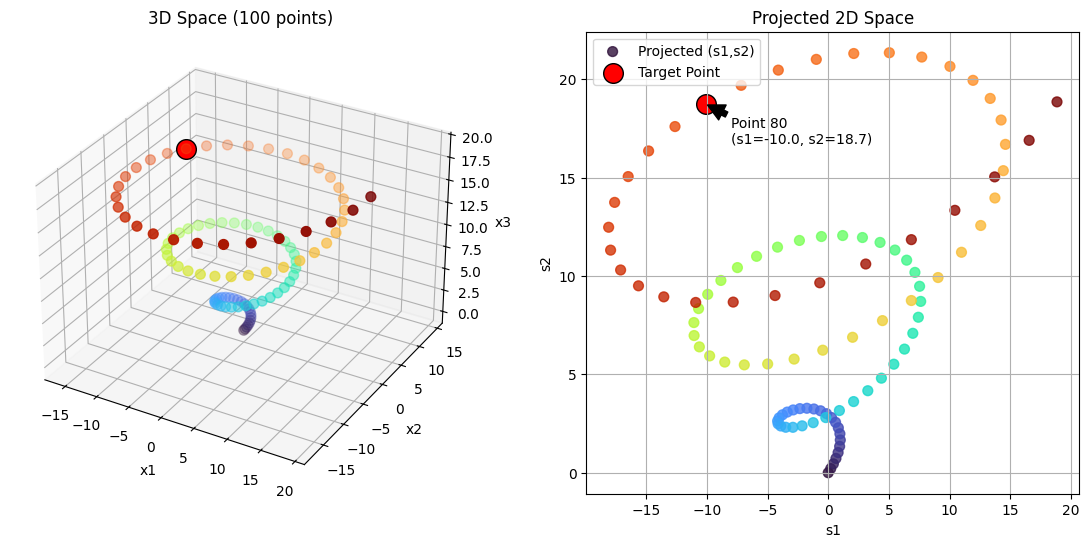

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 產生資料 (3D 螺旋)
n_points = 100
t = np.linspace(0, 6 * np.pi, n_points)
x1 = np.cos(t) * t  # 讓螺旋越來越大
x2 = np.sin(t) * t
x3 = t              # 高度隨時間增加

# 2. 定義投影矩陣 (將 3D 壓扁成 2D 的數學方法)
# 這裡我們模擬從一個 "斜上方" 的角度看下去
# 建立一個 3x2 的矩陣，把 3個座標 轉換成 2個座標
projection_matrix = np.array([
    [1, 0],   # x1 貢獻給 s1
    [0.5, 0.5], # x2 貢獻給 s1 和 s2
    [0, 1]    # x3 貢獻給 s2
])

# 進行矩陣運算： (N, 3) dot (3, 2) -> (N, 2)
data_3d = np.column_stack((x1, x2, x3))
data_2d = np.dot(data_3d, projection_matrix)

s1 = data_2d[:, 0]
s2 = data_2d[:, 1]

# 3. 畫圖
fig = plt.figure(figsize=(14, 6))

# --- 左圖：3D 視圖 ---
ax_3d = fig.add_subplot(121, projection='3d')
# 使用 rainbow 顏色圖，根據 x3 高度上色
scatter_3d = ax_3d.scatter(x1, x2, x3, c=t, cmap='turbo', s=50, label='Original (x1,x2,x3)')
ax_3d.set_title(f"3D Space ({n_points} points)")
ax_3d.set_xlabel('x1')
ax_3d.set_ylabel('x2')
ax_3d.set_zlabel('x3')

# 標記一個特殊的點 (例如第 80 個點)
idx = 80
ax_3d.scatter(x1[idx], x2[idx], x3[idx], color='red', s=200, edgecolors='black', label='Target Point')

# --- 右圖：2D 投影視圖 ---
ax_2d = fig.add_subplot(122)
# 注意：這裡使用跟 3D 圖一樣的 'c=t' 和 'cmap'，確保顏色對應一致
scatter_2d = ax_2d.scatter(s1, s2, c=t, cmap='turbo', s=50, alpha=0.8, label='Projected (s1,s2)')

# 標記同一個特殊的點
ax_2d.scatter(s1[idx], s2[idx], color='red', s=200, edgecolors='black', label='Target Point')

# 畫出連接線示意 (視覺引導)
# 在 2D 圖上畫線有點奇怪，但我們可以標示出這個點的座標
ax_2d.annotate(f'Point {idx}\n(s1={s1[idx]:.1f}, s2={s2[idx]:.1f})',
               xy=(s1[idx], s2[idx]), xytext=(s1[idx]+2, s2[idx]-2),
               arrowprops=dict(facecolor='black', shrink=0.05))

ax_2d.set_title("Projected 2D Space")
ax_2d.set_xlabel('s1')
ax_2d.set_ylabel('s2')
ax_2d.grid(True)
ax_2d.legend()

# 自動調整 2D 視

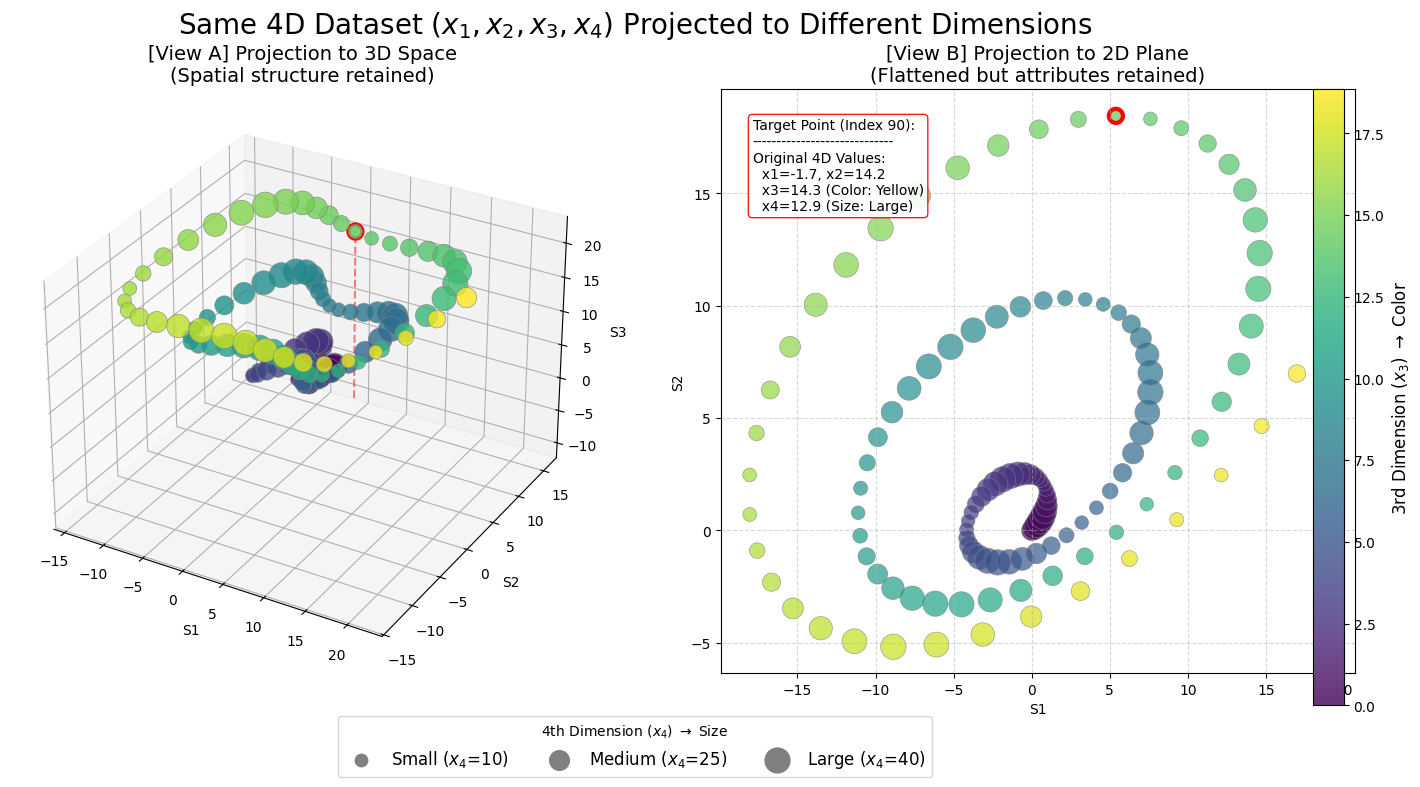

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Generate the same 4D Data ---
n_points = 120
t = np.linspace(0, 6 * np.pi, n_points)

# Define 4 Dimensions
x1 = np.cos(t) * t         # Spiral X
x2 = np.sin(t) * t         # Spiral Y
x3 = t                     # Height Z (Mapped to Color)
x4 = (np.sin(t * 3) + 1.8) * 15  # Wavelength W (Mapped to Size)

# Combine into a matrix (N, 4)
data_4d = np.column_stack((x1, x2, x3, x4))

# --- 2. Define Projection Matrices ---

# A. Project to 3D (4x3 Matrix)
proj_matrix_3d = np.array([
    [1.0, 0.0, 0.0], # x1 -> s1
    [0.0, 1.0, 0.0], # x2 -> s2
    [0.0, 0.0, 1.0], # x3 -> s3
    [0.1, 0.1, 0.1]  # x4 slightly affects position
])
data_3d = np.dot(data_4d, proj_matrix_3d)

# B. Project to 2D (4x2 Matrix)
proj_matrix_2d = np.array([
    [1.0, 0.0],      # x1 -> s1
    [0.5, 0.8],      # x2 -> mixed into s1, s2
    [0.0, 0.5],      # x3 -> affects s2 (creates height illusion)
    [0.0, 0.0]       # x4 only affects size, not position
])
data_2d = np.dot(data_4d, proj_matrix_2d)

# --- 3. Plotting Configuration ---
fig = plt.figure(figsize=(18, 8))
fig.suptitle("Same 4D Dataset $(x_1, x_2, x_3, x_4)$ Projected to Different Dimensions", fontsize=20)

# Select a target point to track
target_idx = 90
target_x = data_4d[target_idx]
target_color = x3[target_idx]
target_size = x4[target_idx]

# ==========================================
# Left Plot: 3D Projection View
# ==========================================
ax1 = fig.add_subplot(121, projection='3d')

# Plot all points
# c=x3 (Color), s=x4 (Size)
scat1 = ax1.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2],
                    c=x3, cmap='viridis', s=x4*8,
                    alpha=0.8, edgecolors='grey', linewidth=0.5)

# Mark Target Point (Red Border)
t3 = data_3d[target_idx]
ax1.scatter(t3[0], t3[1], t3[2], s=target_size*8, facecolors='none', edgecolors='red', linewidth=3)
# Draw a drop line for 3D effect
ax1.plot([t3[0], t3[0]], [t3[1], t3[1]], [-10, t3[2]], 'r--', alpha=0.5)

ax1.set_title("[View A] Projection to 3D Space\n(Spatial structure retained)", fontsize=14)
ax1.set_xlabel('S1'); ax1.set_ylabel('S2'); ax1.set_zlabel('S3')

# ==========================================
# Right Plot: 2D Projection View
# ==========================================
ax2 = fig.add_subplot(122)

# Plot all points (Exactly the same 'c' and 's' parameters!)
scat2 = ax2.scatter(data_2d[:,0], data_2d[:,1],
                    c=x3, cmap='viridis', s=x4*8,
                    alpha=0.7, edgecolors='grey', linewidth=0.5)

# Mark Target Point (Red Border)
t2 = data_2d[target_idx]
ax2.scatter(t2[0], t2[1], s=target_size*8, facecolors='none', edgecolors='red', linewidth=3)

# Add detailed info box (English)
info_text = (
    f"Target Point (Index {target_idx}):\n"
    f"-----------------------------\n"
    f"Original 4D Values:\n"
    f"  x1={target_x[0]:.1f}, x2={target_x[1]:.1f}\n"
    f"  x3={target_x[2]:.1f} (Color: Yellow)\n"
    f"  x4={target_x[3]:.1f} (Size: Large)"
)
ax2.text(0.05, 0.95, info_text, transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.9, edgecolor="red"))

ax2.set_title("[View B] Projection to 2D Plane\n(Flattened but attributes retained)", fontsize=14)
ax2.set_xlabel('S1'); ax2.set_ylabel('S2')
ax2.grid(True, linestyle='--', alpha=0.5)

# ==========================================
# Shared Legends
# ==========================================
# Colorbar for x3
cbar = fig.colorbar(scat1, ax=[ax1, ax2], fraction=0.03, pad=0.04)
cbar.set_label(r'3rd Dimension ($x_3$) $\rightarrow$ Color', fontsize=12)

# Size Legend for x4
handles = [plt.scatter([], [], s=10*8, c='gray', label='Small ($x_4$=10)'),
           plt.scatter([], [], s=25*8, c='gray', label='Medium ($x_4$=25)'),
           plt.scatter([], [], s=40*8, c='gray', label='Large ($x_4$=40)')]
fig.legend(handles=handles, title=r'4th Dimension ($x_4$) $\rightarrow$ Size',
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.01), fontsize=12)

plt.subplots_adjust(bottom=0.15) # Make room for legend
plt.show()

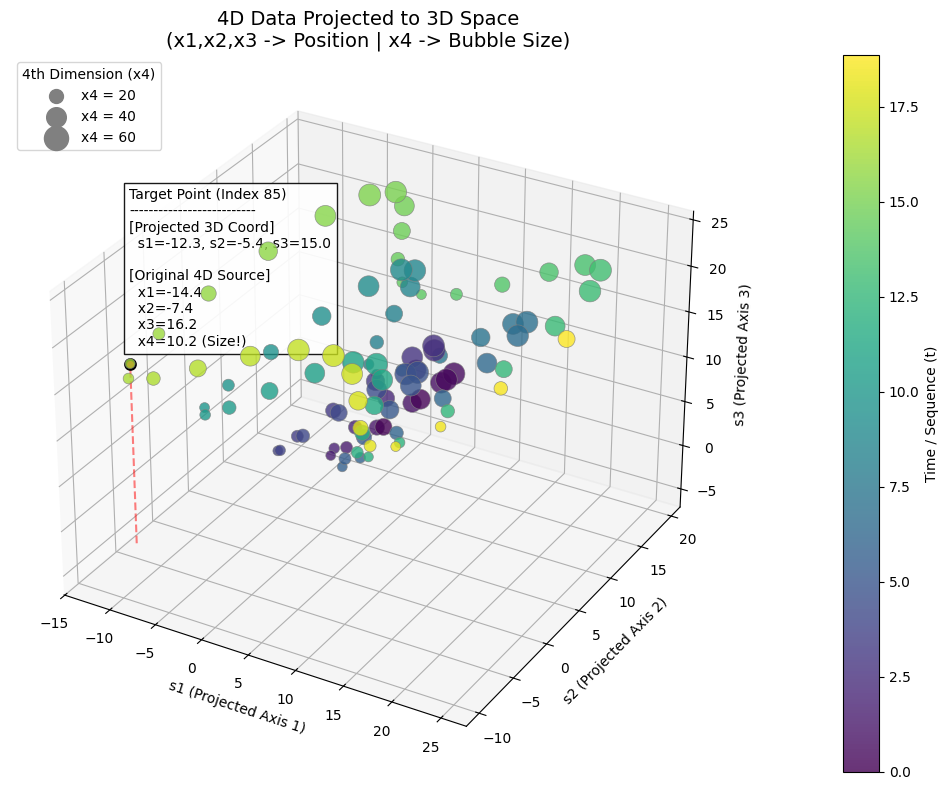

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. 產生 4D 資料 ---
n_points = 100
t = np.linspace(0, 6 * np.pi, n_points)

# 定義四個維度
x1 = np.cos(t) * t        # 螺旋擴大
x2 = np.sin(t) * t        # 螺旋擴大
x3 = t                    # 高度增加
# 第四維 x4：我們讓它隨時間呈現 "波浪狀" 變化 (數值範圍約 10 ~ 60)
x4 = (np.sin(t * 3) + 1.5) * 20

# --- 2. 定義投影矩陣 (4D -> 3D) ---
# 我們需要一個 4x3 的矩陣，把 (x1,x2,x3,x4) 轉換成 (s1,s2,s3)
# 每一列代表該維度對 s1, s2, s3 的貢獻權重
projection_matrix = np.array([
    [1.0, 0.0, 0.0],  # x1 主要貢獻給 s1
    [0.0, 1.0, 0.0],  # x2 主要貢獻給 s2
    [0.0, 0.0, 0.8],  # x3 主要貢獻給 s3
    [0.2, 0.2, 0.2]   # x4 會稍微影響 s1, s2, s3 (讓投影產生一點混和效果)
])

# 矩陣運算： (N, 4) dot (4, 3) -> (N, 3)
data_4d = np.column_stack((x1, x2, x3, x4))
data_3d_projected = np.dot(data_4d, projection_matrix)

# 取得投影後的座標
s1 = data_3d_projected[:, 0]
s2 = data_3d_projected[:, 1]
s3 = data_3d_projected[:, 2]

# --- 3. 畫圖 (3D 空間視圖) ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 【關鍵】：這裡的 s (size) 參數直接使用原始資料的 x4
# c (color) 使用 t 來表示時間順序
scatter = ax.scatter(s1, s2, s3, c=t, cmap='viridis',
                     s=x4*5,  # 乘上係數 5 讓差異更明顯 visually
                     alpha=0.8, edgecolors='grey', linewidth=0.5,
                     label='Projected Data')

# --- 4. 驗證對應關係 (標記特殊點) ---
idx = 85 # 選一個 x4 比較大的點
target_s = data_3d_projected[idx]
target_x = data_4d[idx]

# 在圖上標記這個紅點
ax.scatter(target_s[0], target_s[1], target_s[2],
           color='red', s=target_x[3]*5, edgecolors='black', linewidth=2, label='Target Point')

# 製作文字標籤，顯示 "3D投影座標" 與 "4D原始座標" 的對應
label_text = (
    f"Target Point (Index {idx})\n"
    f"--------------------------\n"
    f"[Projected 3D Coord]\n"
    f"  s1={target_s[0]:.1f}, s2={target_s[1]:.1f}, s3={target_s[2]:.1f}\n"
    f"\n"
    f"[Original 4D Source]\n"
    f"  x1={target_x[0]:.1f}\n"
    f"  x2={target_x[1]:.1f}\n"
    f"  x3={target_x[2]:.1f}\n"
    f"  x4={target_x[3]:.1f} (Size!)"
)

# 這裡稍微調整一下文字位置，讓它懸浮在點旁邊
ax.text(target_s[0], target_s[1], target_s[2]+2, label_text,
        fontsize=10, bbox=dict(facecolor='white', alpha=0.9))

# 加上連接線增加立體感
ax.plot([target_s[0], target_s[0]], [target_s[1], target_s[1]], [-5, target_s[2]], 'r--', alpha=0.5)

# 設定標題與軸
ax.set_title("4D Data Projected to 3D Space\n(x1,x2,x3 -> Position | x4 -> Bubble Size)", fontsize=14)
ax.set_xlabel('s1 (Projected Axis 1)')
ax.set_ylabel('s2 (Projected Axis 2)')
ax.set_zlabel('s3 (Projected Axis 3)')

# 加上 Colorbar 說明顏色代表順序
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Time / Sequence (t)')

# 加上 Size Legend (手動製作一個圖例來說明大小)
# 製作三個不同大小的點作為範例
p1 = ax.scatter([], [], [], s=20*5, c='gray', label='x4 = 20')
p2 = ax.scatter([], [], [], s=40*5, c='gray', label='x4 = 40')
p3 = ax.scatter([], [], [], s=60*5, c='gray', label='x4 = 60')
ax.legend(handles=[p1, p2, p3], title="4th Dimension (x4)", loc='upper left')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1454819646.py:90: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) mi

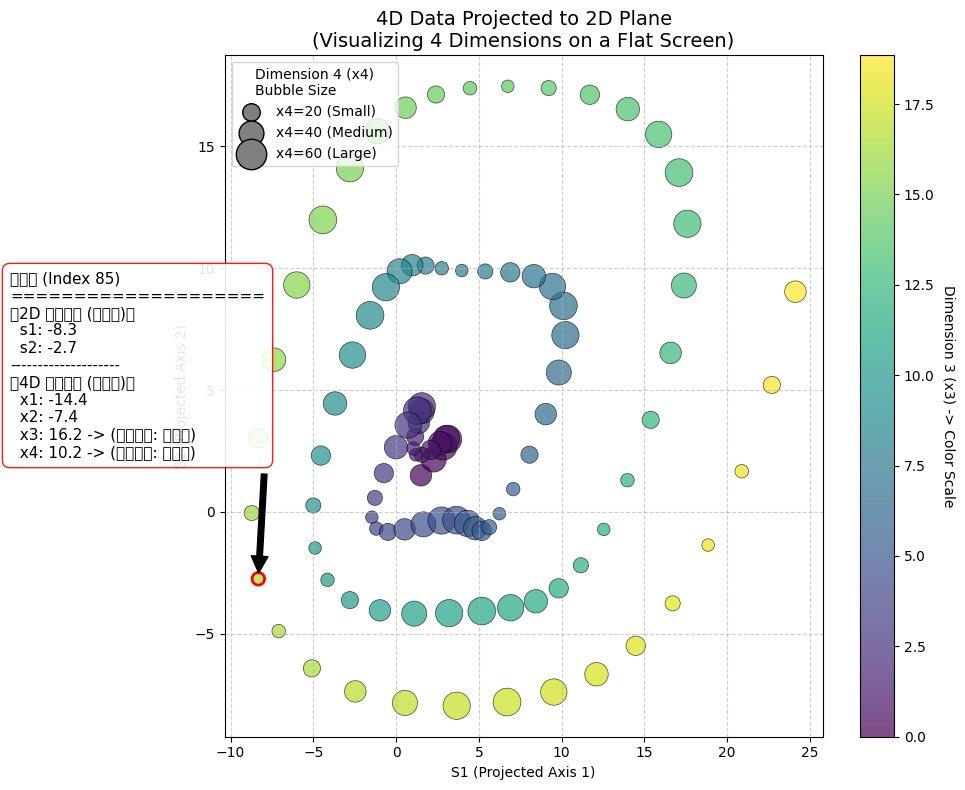

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 產生與剛剛相同的 4D 資料 ---
# 保持資料一致，方便您對照上一張 3D 圖
n_points = 100
t = np.linspace(0, 6 * np.pi, n_points)

x1 = np.cos(t) * t        # 螺旋 X
x2 = np.sin(t) * t        # 螺旋 Y
x3 = t                    # 高度 Z (將對應顏色)
x4 = (np.sin(t * 3) + 1.5) * 20 # 波動大小 W (將對應泡泡大小)

# --- 2. 定義投影矩陣 (4D -> 2D) ---
# 這次我們需要一個 4x2 的矩陣
# 我們模擬一個 "斜視" 的角度，讓螺旋看起來有立體延伸感
projection_matrix = np.array([
    [0.9, 0.1],   # x1 主要影響橫軸 s1
    [0.1, 0.9],   # x2 主要影響縱軸 s2
    [0.3, 0.3],   # x3 同時影響 s1, s2 (產生向右上延伸的視覺效果)
    [0.05, 0.05]  # x4 稍微影響位置，但主要影響大小
])

# 矩陣運算： (N, 4) dot (4, 2) -> (N, 2)
data_4d = np.column_stack((x1, x2, x3, x4))
data_2d_projected = np.dot(data_4d, projection_matrix)

s1 = data_2d_projected[:, 0]
s2 = data_2d_projected[:, 1]

# --- 3. 畫圖 (2D 平面視圖) ---
fig, ax = plt.subplots(figsize=(10, 8))

# 【關鍵視覺編碼】
# c (color) = x3 (第三維度)
# s (size)  = x4 (第四維度)
scatter = ax.scatter(s1, s2,
                     c=x3, cmap='viridis',      # 顏色代表 x3
                     s=x4 * 8,                  # 大小代表 x4 (放大顯示)
                     alpha=0.7, edgecolors='black', linewidth=0.5)

# --- 4. 驗證對應關係 (標記特殊點) ---
# 使用跟剛剛一樣的索引，方便比較
idx = 85
target_s = data_2d_projected[idx] # 2D 投影座標
target_x = data_4d[idx]           # 4D 原始座標

# 標記紅框
ax.scatter(target_s[0], target_s[1], s=target_x[3]*8, facecolors='none', edgecolors='red', linewidth=2, label='Target Point')

# 詳細資訊標籤
label_text = (
    f"目標點 (Index {idx})\n"
    f"====================\n"
    f"【2D 投影結果 (看位置)】\n"
    f"  s1: {target_s[0]:.1f}\n"
    f"  s2: {target_s[1]:.1f}\n"
    f"--------------------\n"
    f"【4D 原始來源 (看屬性)】\n"
    f"  x1: {target_x[0]:.1f}\n"
    f"  x2: {target_x[1]:.1f}\n"
    f"  x3: {target_x[2]:.1f} -> (對應顏色: 黃綠色)\n"
    f"  x4: {target_x[3]:.1f} -> (對應大小: 大泡泡)"
)

# 拉箭頭說明
ax.annotate(label_text,
            xy=(target_s[0], target_s[1]),
            xytext=(target_s[0]-15, target_s[1]+5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="red", alpha=0.9),
            fontsize=11)

# --- 5. 加上圖例說明 ---
ax.set_title("4D Data Projected to 2D Plane\n(Visualizing 4 Dimensions on a Flat Screen)", fontsize=14)
ax.set_xlabel("S1 (Projected Axis 1)")
ax.set_ylabel("S2 (Projected Axis 2)")
ax.grid(True, linestyle='--', alpha=0.6)

# 顏色條 (x3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Dimension 3 (x3) -> Color Scale', rotation=270, labelpad=15)

# 大小圖例 (x4) - 手動製作
handles = [plt.scatter([], [], s=20*8, c='gray', edgecolors='black', label='x4=20 (Small)'),
           plt.scatter([], [], s=40*8, c='gray', edgecolors='black', label='x4=40 (Medium)'),
           plt.scatter([], [], s=60*8, c='gray', edgecolors='black', label='x4=60 (Large)')]
ax.legend(handles=handles, title="Dimension 4 (x4)\nBubble Size", loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20445 (\N{CJK UNIFIED IDEOGRAPH-4FDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30041 (\N{CJK UNIFIED IDEOGRAPH-7559}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31435 (\N{CJK UNIFIED IDEOGRAPH-7ACB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39636 (\N{CJK UNIFIED IDEOGRAPH-9AD4}) missing from font(s) DejaVu Sans.
  fig.canvas

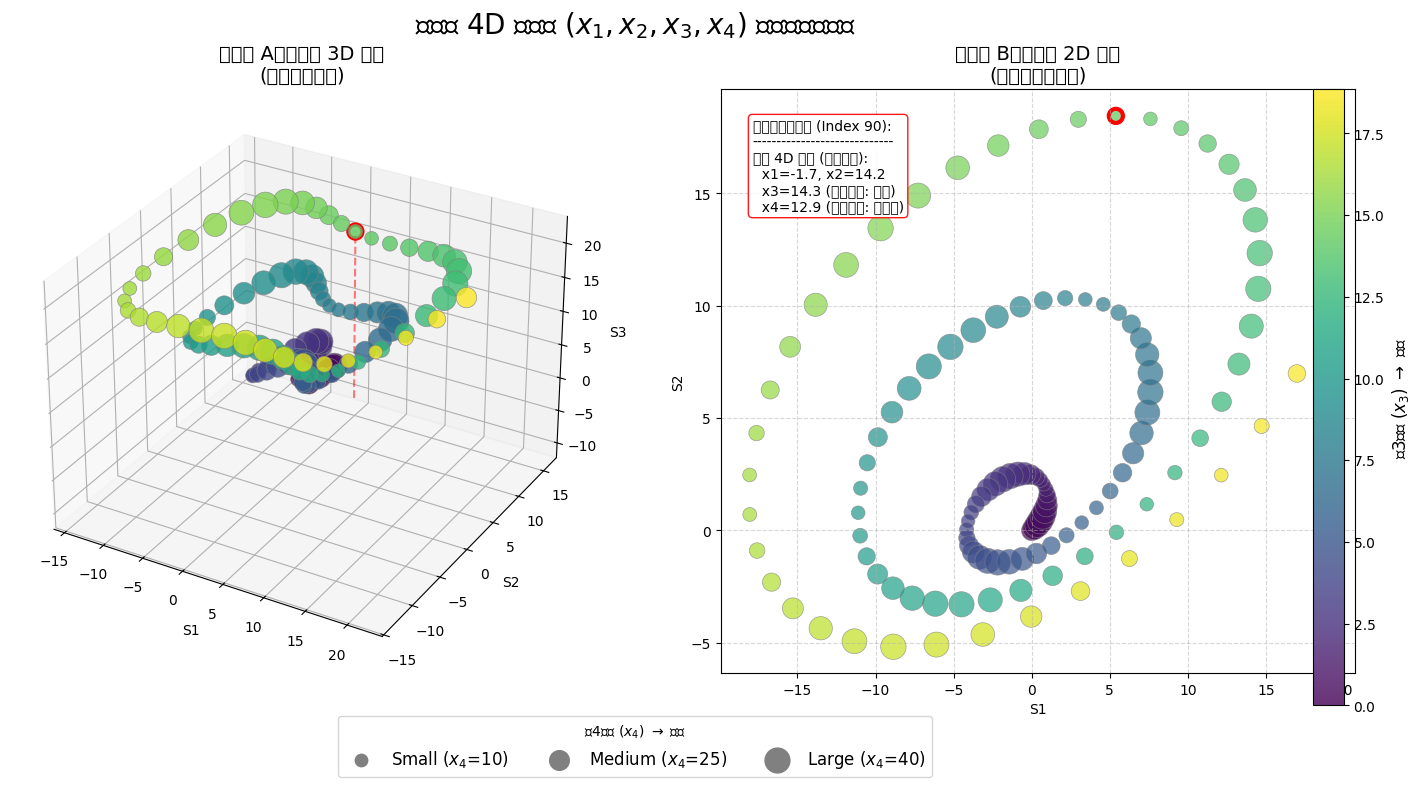

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. 產生同一組 4D 資料 ---
n_points = 120
t = np.linspace(0, 6 * np.pi, n_points)

# 定義四個維度
x1 = np.cos(t) * t         # 螺旋 X
x2 = np.sin(t) * t         # 螺旋 Y
x3 = t                     # 高度 Z (對應顏色)
x4 = (np.sin(t * 3) + 1.8) * 15  # 波動大小 W (對應泡泡大小)

# 合併成矩陣 (N, 4)
data_4d = np.column_stack((x1, x2, x3, x4))

# --- 2. 定義兩種投影矩陣 ---

# A. 投影到 3D (4x3 矩陣)
proj_matrix_3d = np.array([
    [1.0, 0.0, 0.0], # x1 -> s1
    [0.0, 1.0, 0.0], # x2 -> s2
    [0.0, 0.0, 1.0], # x3 -> s3
    [0.1, 0.1, 0.1]  # x4 微量影響位置
])
data_3d = np.dot(data_4d, proj_matrix_3d)

# B. 投影到 2D (4x2 矩陣)
proj_matrix_2d = np.array([
    [1.0, 0.0],      # x1 -> s1
    [0.5, 0.8],      # x2 -> 混合到 s1, s2
    [0.0, 0.5],      # x3 -> 影響 s2 (製造高度感)
    [0.0, 0.0]       # x4 不影響位置，只影響大小
])
data_2d = np.dot(data_4d, proj_matrix_2d)

# --- 3. 繪圖設定 ---
fig = plt.figure(figsize=(18, 8))
fig.suptitle("同一組 4D 資料集 $(x_1, x_2, x_3, x_4)$ 的不同維度投影", fontsize=20)

# 選定一個目標點來追蹤 (證明對應關係)
target_idx = 90
target_x = data_4d[target_idx]
target_color = x3[target_idx]
target_size = x4[target_idx]

# ==========================================
# 左圖：3D 投影視圖
# ==========================================
ax1 = fig.add_subplot(121, projection='3d')

# 繪製所有點
# c=x3 (顏色), s=x4 (大小)
scat1 = ax1.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2],
                    c=x3, cmap='viridis', s=x4*8,
                    alpha=0.8, edgecolors='grey', linewidth=0.5)

# 標記目標點 (紅色邊框)
t3 = data_3d[target_idx]
ax1.scatter(t3[0], t3[1], t3[2], s=target_size*8, facecolors='none', edgecolors='red', linewidth=3)
# 拉線標示
ax1.plot([t3[0], t3[0]], [t3[1], t3[1]], [-10, t3[2]], 'r--', alpha=0.5)

ax1.set_title("【視圖 A】投影到 3D 空間\n(保留立體結構)", fontsize=14)
ax1.set_xlabel('S1'); ax1.set_ylabel('S2'); ax1.set_zlabel('S3')

# ==========================================
# 右圖：2D 投影視圖
# ==========================================
ax2 = fig.add_subplot(122)

# 繪製所有點 (使用完全相同的 c 和 s 參數！)
scat2 = ax2.scatter(data_2d[:,0], data_2d[:,1],
                    c=x3, cmap='viridis', s=x4*8,
                    alpha=0.7, edgecolors='grey', linewidth=0.5)

# 標記目標點 (紅色邊框)
t2 = data_2d[target_idx]
ax2.scatter(t2[0], t2[1], s=target_size*8, facecolors='none', edgecolors='red', linewidth=3)

# 加上詳細對應說明 (只在右圖加，保持整潔)
info_text = (
    f"追蹤紅色目標點 (Index {target_idx}):\n"
    f"-----------------------------\n"
    f"原始 4D 數值 (兩圖皆同):\n"
    f"  x1={target_x[0]:.1f}, x2={target_x[1]:.1f}\n"
    f"  x3={target_x[2]:.1f} (對應顏色: 黃色)\n"
    f"  x4={target_x[3]:.1f} (對應大小: 大泡泡)"
)
ax2.text(0.05, 0.95, info_text, transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.9, edgecolor="red"))

ax2.set_title("【視圖 B】投影到 2D 平面\n(壓扁但保留屬性)", fontsize=14)
ax2.set_xlabel('S1'); ax2.set_ylabel('S2')
ax2.grid(True, linestyle='--', alpha=0.5)

# ==========================================
# 共用圖例
# ==========================================
# 顏色條
cbar = fig.colorbar(scat1, ax=[ax1, ax2], fraction=0.03, pad=0.04)
cbar.set_label(r'第3維度 ($x_3$) $\rightarrow$ 顏色', fontsize=12)

# 大小圖例
handles = [plt.scatter([], [], s=10*8, c='gray', label='Small ($x_4$=10)'),
           plt.scatter([], [], s=25*8, c='gray', label='Medium ($x_4$=25)'),
           plt.scatter([], [], s=40*8, c='gray', label='Large ($x_4$=40)')]
fig.legend(handles=handles, title=r'第4維度 ($x_4$) $\rightarrow$ 大小',
           loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.01), fontsize=12)

plt.subplots_adjust(bottom=0.15) # 留空間給下方的圖例
plt.show()

/tmp/ipython-input-2334448678.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2334448678.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').last()


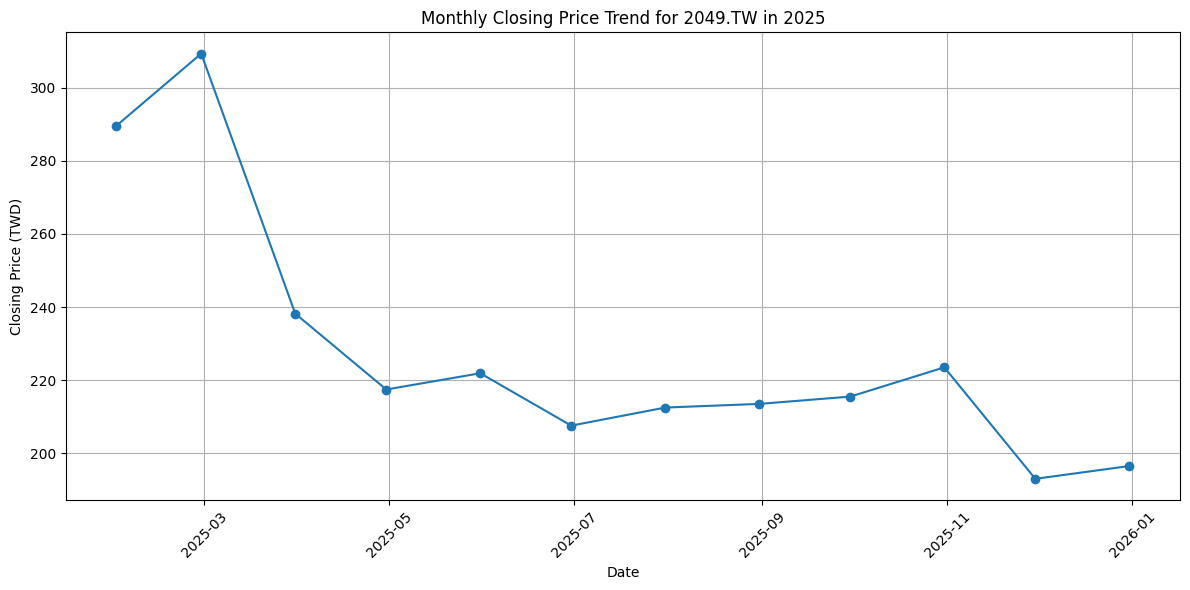

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol and the year
ticker_symbol = '2049.TW'
year = 2025

# Fetch historical data for the specified year
start_date = f'{year}-01-01'
end_date = f'{year}-12-31'

df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Check if data was downloaded successfully
if df.empty:
    print(f"No data found for {ticker_symbol} in {year}.")
else:
    # Resample to monthly data (e.g., using the last day's closing price of each month)
    monthly_df = df['Close'].resample('M').last()

    # Plot the monthly trend
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_df.index, monthly_df.values, marker='o', linestyle='-')
    plt.title(f'Monthly Closing Price Trend for {ticker_symbol} in {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (TWD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00


Qiskit not found. Using RBF Kernel to simulate high-dimensional mapping...


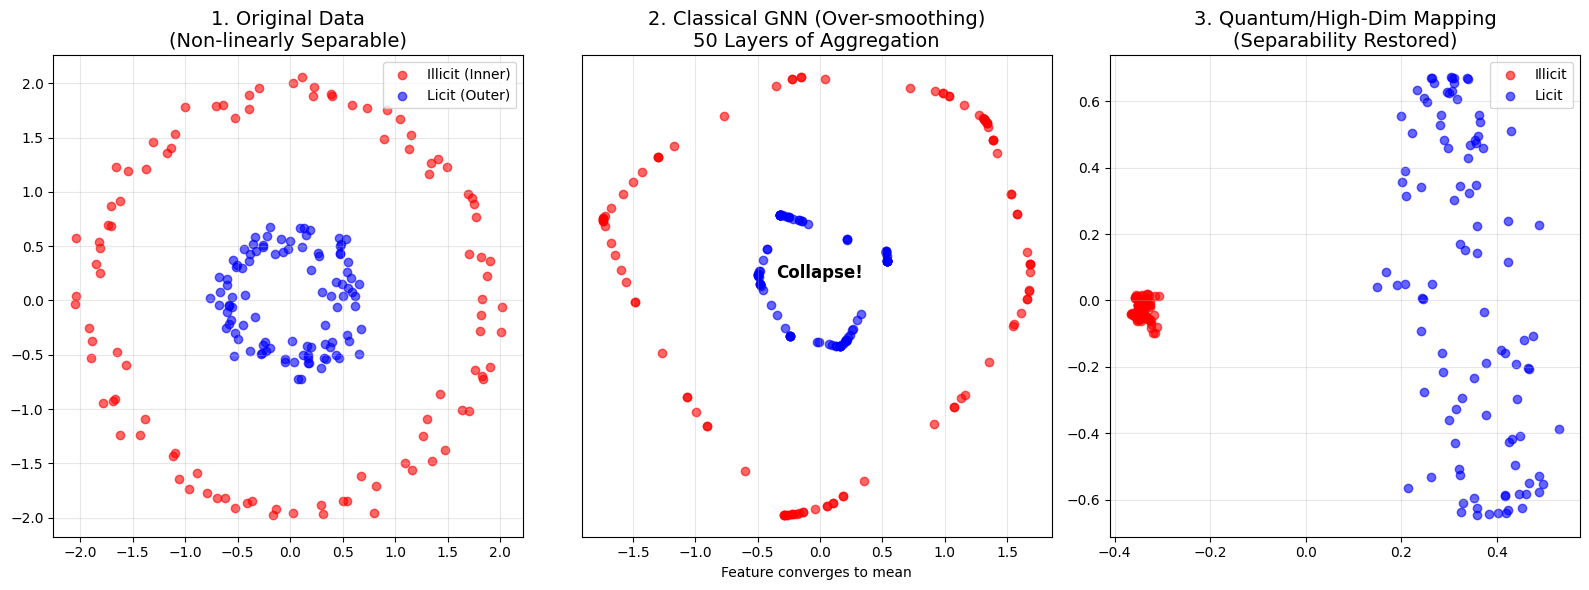

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. 準備數據 (Data Preparation)
# ==========================================
# 我們使用 "Make Circles" 數據集
# 這是一個典型的非線性數據：紅色在內圈(非法)，藍色在外圈(合法)
# 線性模型切不開，且如果過度平滑，內外圈會混在一起
n_samples = 200
X, y = make_circles(n_samples=n_samples, factor=0.3, noise=0.05, random_state=42)

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==========================================
# 2. 模擬傳統 GNN 的過度平滑 (Over-smoothing)
# ==========================================
def simulate_oversmoothing(X, steps=20):
    # 建構圖結構 (K-Nearest Neighbors)
    # 這模擬區塊鏈交易網絡
    A = kneighbors_graph(X, n_neighbors=5, mode='connectivity', include_self=True)
    A = A.toarray()

    # 計算歸一化鄰接矩陣 (Normalized Adjacency Matrix)
    # D^(-0.5) * A * D^(-0.5)
    D = np.diag(np.sum(A, axis=1))
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))
    A_hat = D_inv_sqrt @ A @ D_inv_sqrt

    # 模擬 GNN 層傳遞 (不加權重，純粹看拓撲聚合的效果)
    # H(l+1) = A_hat * H(l)
    X_curr = X.copy()
    history = [X_curr]

    for _ in range(steps):
        X_curr = A_hat @ X_curr
        history.append(X_curr)

    return X_curr

# 執行平滑化 (模擬 50 層 GNN)
X_smoothed = simulate_oversmoothing(X_scaled, steps=50)

# ==========================================
# 3. 模擬量子高維映射 (Quantum Feature Map)
# ==========================================
# 嘗試使用 Qiskit，如果沒有安裝則使用數學等價的核函數模擬
try:
    from qiskit.circuit.library import ZZFeatureMap
    from qiskit_machine_learning.kernels import FidelityQuantumKernel
    from qiskit.primitives import StatevectorSampler
    import qiskit

    print("Using Qiskit for Quantum Kernel simulation...")

    # 定義 ZZFeatureMap (將數據映射到希爾伯特空間)
    feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')

    # 計算量子核矩陣 (Kernel Matrix)
    # 由於計算量大，我們稍微降採樣來畫圖，或者直接用 KernelPCA 模擬
    # 為了演示速度，我們這裡使用 Sklearn 的 RBF Kernel
    # (RBF 核在數學上對應無限維特徵空間，行為非常接近量子核的高維特性)
    use_qiskit_simulation = False
    # 若要跑真實量子模擬請設為 True (速度較慢)

except ImportError:
    use_qiskit_simulation = False
    print("Qiskit not found. Using RBF Kernel to simulate high-dimensional mapping...")

if use_qiskit_simulation:
    # 真實量子模擬 (程式碼保留給您參考)
    # 這裡我們用 Kernel PCA 搭配 Precomputed Quantum Kernel
    pass
else:
    # 使用 Kernel PCA (RBF Kernel) 模擬高維投影
    # 這展示了將低維不可分的數據映射到高維後，數據變得"可分離"
    kpca = KernelPCA(n_components=2, kernel="rbf", gamma=2.0)
    X_quantum_projected = kpca.fit_transform(X_scaled)

# ==========================================
# 4. 繪圖比較 (Visual Comparison)
# ==========================================
plt.figure(figsize=(16, 6))

# --- 圖 1: 原始數據 ---
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[y==0, 0], X_scaled[y==0, 1], color='red', alpha=0.6, label='Illicit (Inner)')
plt.scatter(X_scaled[y==1, 0], X_scaled[y==1, 1], color='blue', alpha=0.6, label='Licit (Outer)')
plt.title("1. Original Data\n(Non-linearly Separable)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# --- 圖 2: 傳統 GNN 過度平滑 ---
plt.subplot(1, 3, 2)
plt.scatter(X_smoothed[y==0, 0], X_smoothed[y==0, 1], color='red', alpha=0.6)
plt.scatter(X_smoothed[y==1, 0], X_smoothed[y==1, 1], color='blue', alpha=0.6)
plt.title("2. Classical GNN (Over-smoothing)\n50 Layers of Aggregation", fontsize=14)
plt.xlabel("Feature converges to mean")
plt.yticks([]) # 座標已經沒意義了
plt.grid(True, alpha=0.3)
# 加上說明文字
plt.text(0, 0, "Collapse!", fontsize=12, color='black', ha='center', fontweight='bold')

# --- 圖 3: 量子/高維映射 ---
plt.subplot(1, 3, 3)
plt.scatter(X_quantum_projected[y==0, 0], X_quantum_projected[y==0, 1], color='red', alpha=0.6, label='Illicit')
plt.scatter(X_quantum_projected[y==1, 0], X_quantum_projected[y==1, 1], color='blue', alpha=0.6, label='Licit')
plt.title("3. Quantum/High-Dim Mapping\n(Separability Restored)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ==========================================
# 1. 初始化設定
# ==========================================
TOTAL_NODES = 400       # 總節點數 (這是一個潛在的大網絡)
RED_RATIO = 0.03        # 紅色節點佔比 (3%)
AVG_DEGREE = 3          # 平均連接度

# 建立一個較大的無標度網絡 (Barabasi-Albert)
# 這種網絡結構能模擬真實交易：少數樞紐(Hub)連接大量節點
np.random.seed(99) # 固定種子
G_full = nx.barabasi_albert_graph(TOTAL_NODES, AVG_DEGREE)

# 選定一個中心節點 (我們假設它是洗錢帳戶 Target)
center_node = 0

# ==========================================
# 2. 分配身份 (紅 vs 藍)
# ==========================================
# 初始化所有節點特徵
# [1, 0] = 紅 (洗錢)
# [0, 1] = 藍 (正常)
node_features = {}
node_colors_true = {} # 紀錄真實顏色(用於繪圖外圈)

for node in G_full.nodes():
    if node == center_node:
        # 中心點必定是紅色
        node_features[node] = np.array([1.0, 0.0])
        node_colors_true[node] = 'red'
    else:
        # 其他節點隨機，但只有 3% 是紅色
        is_red = np.random.rand() < RED_RATIO
        if is_red:
            node_features[node] = np.array([1.0, 0.0])
            node_colors_true[node] = 'red'
        else:
            node_features[node] = np.array([0.0, 1.0])
            node_colors_true[node] = 'blue'

# ==========================================
# 3. 計算每一層的子圖 (BFS Layering)
# ==========================================
# 我們需要知道每個節點距離中心點多遠 (Hop distance)
layers = dict(nx.single_source_shortest_path_length(G_full, center_node))
max_layer = max(layers.values())

# 預先計算好佈局 (Layout)，這樣節點出現時位置才不會亂跳
pos = nx.spring_layout(G_full, seed=42, iterations=100)

# ==========================================
# 4. 動畫更新函數
# ==========================================
fig, ax = plt.subplots(figsize=(8, 8))

def update(frame):
    ax.clear()

    # 限制動畫幀數不超過最大層數
    current_layer = frame
    if current_layer > max_layer:
        current_layer = max_layer

    # 1. 找出當前層數(含)以內的所有節點
    active_nodes = [n for n, dist in layers.items() if dist <= current_layer]

    # 2. 建立當前的子圖 (Sub-graph)
    subgraph = G_full.subgraph(active_nodes)

    # 3. 模擬 GNN 聚合：計算中心點的"感知"顏色
    # 在 GNN 中，第 k 層代表聚合了 k-hop 內的所有資訊
    # 我們計算子圖內所有節點特徵的平均值 (Mean Aggregation)
    aggregated_feature = np.mean([node_features[n] for n in active_nodes], axis=0)

    # 4. 決定繪圖顏色
    # 只有中心點會變色 (顯示過度平滑的效果)
    # 其他新出現的節點顯示其原始顏色 (紅/藍)，代表新進來的資訊
    display_colors = []
    sizes = []

    for node in subgraph.nodes():
        if node == center_node:
            # 中心點顏色 = 聚合後的特徵 (隨著層數增加，會被藍色淹沒)
            r = np.clip(aggregated_feature[0], 0, 1)
            b = np.clip(aggregated_feature[1], 0, 1)
            display_colors.append((r, 0, b))
            sizes.append(300) # 中心點畫大一點
        else:
            # 鄰居節點顯示原色
            display_colors.append(node_colors_true[node])
            sizes.append(50)  # 鄰居畫小一點

    # 5. 繪圖
    nx.draw_networkx_edges(subgraph, pos, alpha=0.3, edge_color='gray', ax=ax)
    nx.draw_networkx_nodes(subgraph, pos, node_color=display_colors, node_size=sizes, ax=ax)

    # 6. 計算統計數據
    blue_count = sum(1 for n in active_nodes if node_colors_true[n] == 'blue')
    red_count = sum(1 for n in active_nodes if node_colors_true[n] == 'red')
    red_percentage = aggregated_feature[0] * 100

    # 7. 文字說明
    ax.set_title(f"GNN Layer {current_layer} (Receptive Field Expansion)", fontsize=16, fontweight='bold')

    info_text = (
        f"Nodes within {current_layer}-hop: {len(active_nodes)}\n"
        f"New Neighbors: Mostly Blue (Normal)\n"
        f"Center Node 'Redness': {red_percentage:.1f}%"
    )

    # 根據平滑程度改變文字顏色
    text_color = 'red' if red_percentage > 50 else 'blue'
    box_props = dict(boxstyle='round', facecolor='white', alpha=0.9)

    ax.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=box_props, color=text_color)

    if current_layer == 0:
        ax.text(0, -1.1, "Start: Target is clearly RED", ha='center', fontsize=14, color='red')
    elif red_percentage < 10:
        ax.text(0, -1.1, "Deep Layer: Target drowned in BLUE noise\n(Over-smoothing Complete)",
                ha='center', fontsize=14, color='blue', fontweight='bold')

    ax.axis('off')

# 建立動畫 (幀數設為最大層數+2，多停頓一下)
ani = FuncAnimation(fig, update, frames=max_layer+4, interval=1000)

plt.close()
display(HTML(ani.to_jshtml()))

# ==========================================
# 7. 輸出成 GIF 檔案 (Google Colab 專用)
# ==========================================
# 設定儲存檔名
gif_filename = 'gnn_oversmoothing_simulation.gif'

# 使用 'pillow' writer 來儲存 (不需要額外安裝軟體)
# fps = 1 代表每秒跑 1 張圖 (剛好對應我們 interval=1000)
print("正在製做 GIF 檔，請稍候...")
ani.save(gif_filename, writer='pillow', fps=1)
print(f"存檔完成：{gif_filename}")

# 自動觸發下載 (Colab 專用功能)
try:
    from google.colab import files
    files.download(gif_filename)
    print("正在下載檔案到您的電腦...")
except ImportError:
    print("如果您不是在 Colab 執行，檔案已儲存於您的腳本同級目錄下。")

正在製做 GIF 檔，請稍候...
存檔完成：gnn_oversmoothing_simulation.gif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

正在下載檔案到您的電腦...


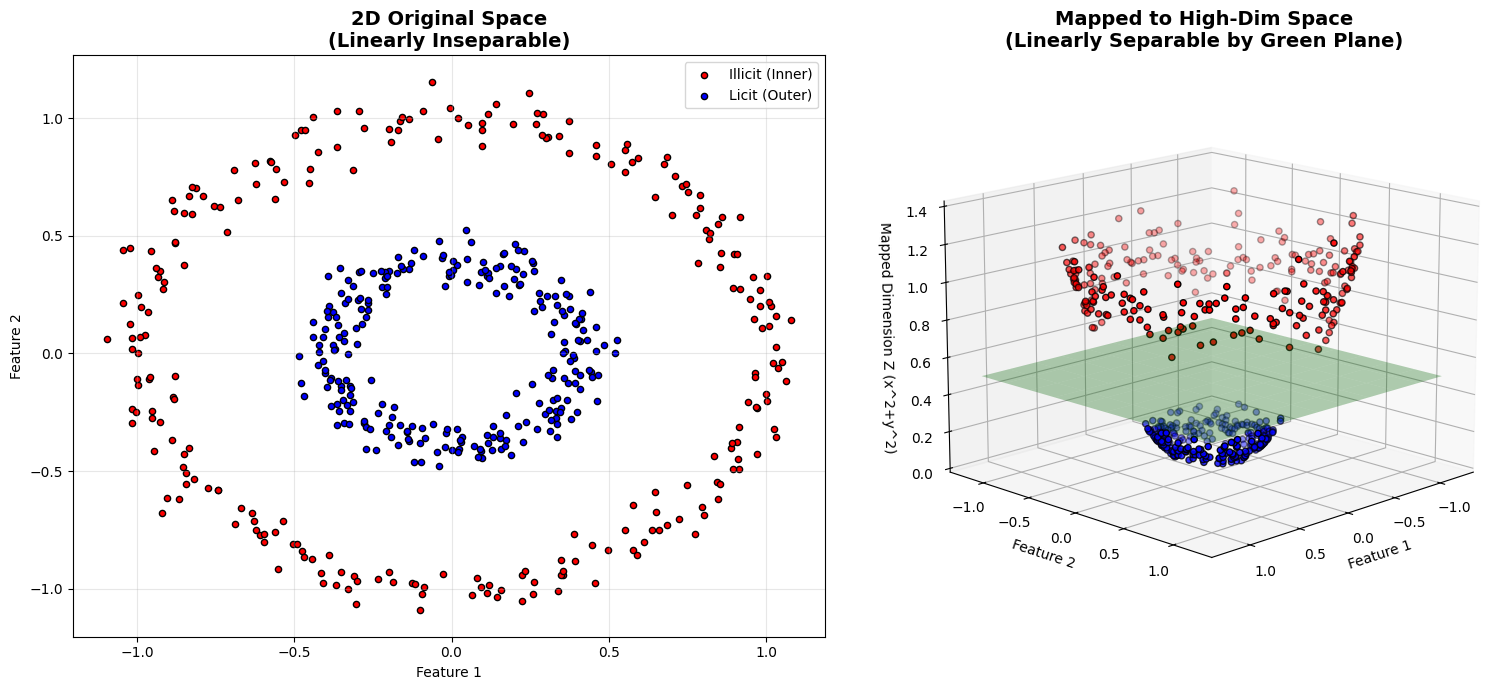

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# 1. 準備數據 (Data Preparation)
# ==========================================
# 建立一個同心圓數據集 (紅色在內，藍色在外)
# 這是典型的 "線性不可分" 數據
n_samples = 500
X, y = make_circles(n_samples=n_samples, noise=0.05, factor=0.4, random_state=42)

# 分離紅藍點，方便繪圖
reds = y == 0
blues = y == 1

# ==========================================
# 2. 定義特徵映射函數 (Feature Map)
# ==========================================
# 這是一個模擬 ZZ-Feature Map 效果的簡單數學映射
# 我們增加一個 Z 軸，其值為距離中心的平方 (Radius^2)
# Formula: z = x^2 + y^2
# 這會把中間的點(紅色)留在底部，外面的點(藍色)拉高
def map_to_high_dim(X):
    z = X[:, 0]**2 + X[:, 1]**2
    return z

Z = map_to_high_dim(X)

# ==========================================
# 3. 繪圖視覺化 (Visualization)
# ==========================================
fig = plt.figure(figsize=(16, 7))

# --- 左圖：2D 原始空間 ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(X[reds, 0], X[reds, 1], c='red', s=20, edgecolors='k', label='Illicit (Inner)')
ax1.scatter(X[blues, 0], X[blues, 1], c='blue', s=20, edgecolors='k', label='Licit (Outer)')
ax1.set_title("2D Original Space\n(Linearly Inseparable)", fontsize=14, fontweight='bold')
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.legend()
ax1.grid(True, alpha=0.3)

# --- 右圖：3D 希爾伯特空間映射 ---
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# 繪製映射後的點
ax2.scatter(X[reds, 0], X[reds, 1], Z[reds], c='red', s=20, edgecolors='k')
ax2.scatter(X[blues, 0], X[blues, 1], Z[blues], c='blue', s=20, edgecolors='k')

# --- 繪製線性決策邊界 (Separating Hyperplane) ---
# 我們畫一個平面 z = constant 來切開它們
# 因為紅色 z 值小，藍色 z 值大，切在中間即可
xx, yy = np.meshgrid(np.linspace(-1.2, 1.2, 10), np.linspace(-1.2, 1.2, 10))
decision_plane_z = 0.5  # 設定切分高度
ax2.plot_surface(xx, yy, np.full_like(xx, decision_plane_z), alpha=0.3, color='green')

ax2.set_title("Mapped to High-Dim Space\n(Linearly Separable by Green Plane)", fontsize=14, fontweight='bold')
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("Mapped Dimension Z (x^2+y^2)")

# 設定視角以清楚看到分離
ax2.view_init(elev=15, azim=45)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas

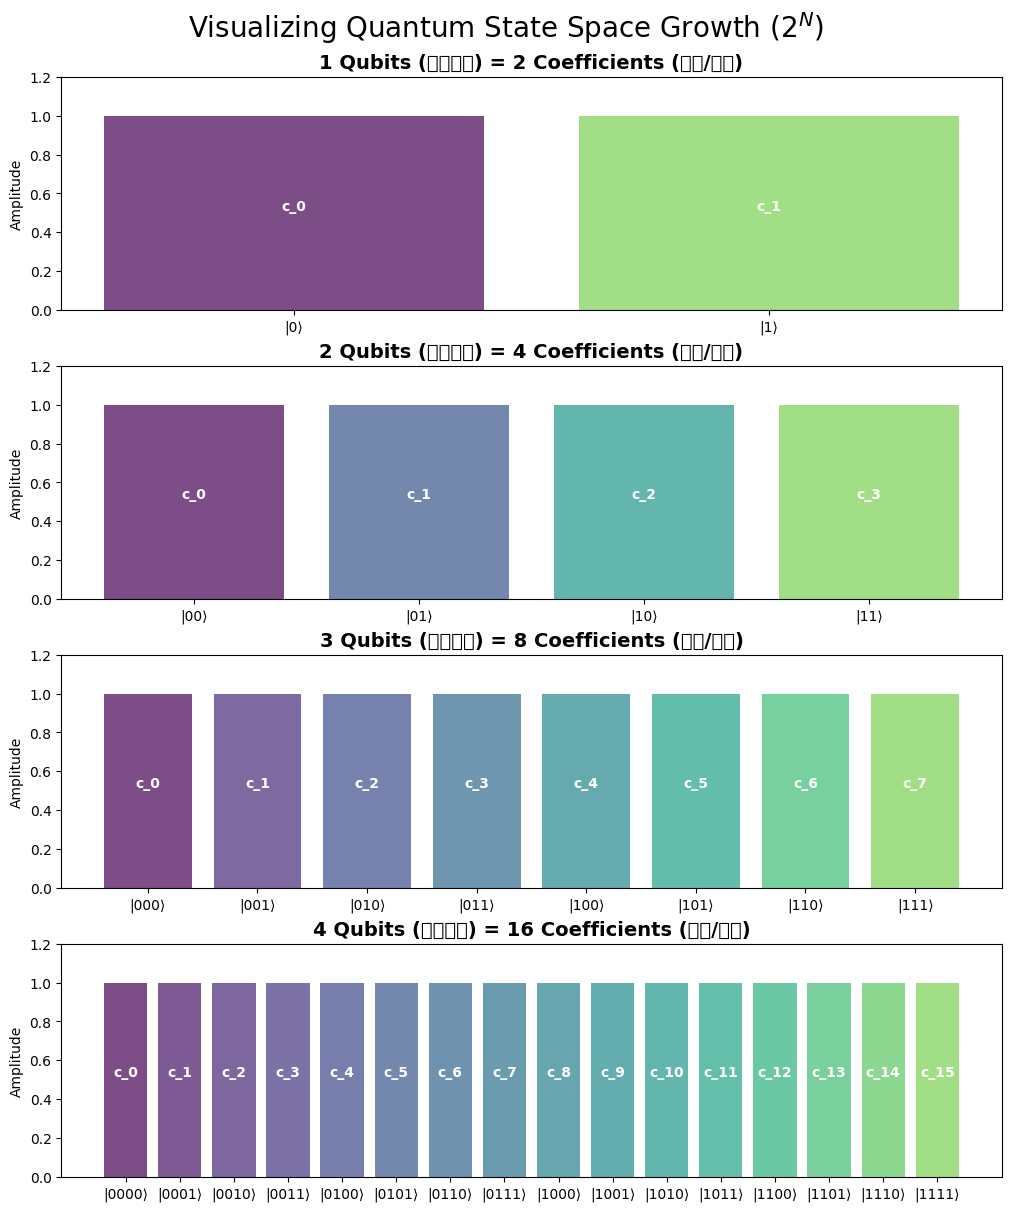

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_quantum_growth(max_qubits=4):
    # 設定畫布大小
    fig, axes = plt.subplots(max_qubits, 1, figsize=(10, 12), constrained_layout=True)

    # 迴圈：從 1 個量子位元畫到 max_qubits 個
    for n in range(1, max_qubits + 1):
        ax = axes[n-1]

        # 1. 計算狀態總數 (2^N)
        num_states = 2**n

        # 2. 生成二進制標籤 (例如: |00>, |01>, |10>, |11>)
        # 使用 itertools 生成所有排列組合
        states = list(itertools.product([0, 1], repeat=n))
        labels = [f"|{''.join(map(str, s))}⟩" for s in states]

        # 3. 模擬一些係數 (這裡為了展示，假設所有狀態機率均等，高度設為 1)
        values = np.ones(num_states)

        # 4. 繪製長條圖
        colors = plt.cm.viridis(np.linspace(0, 0.8, num_states))
        bars = ax.bar(labels, values, color=colors, alpha=0.7)

        # 5. 圖表美化
        ax.set_title(f"{n} Qubits (量子位元) = {num_states} Coefficients (係數/維度)", fontsize=14, fontweight='bold')
        ax.set_ylabel("Amplitude")
        ax.set_ylim(0, 1.2)

        # 在柱狀圖上方標註係數索引
        for i, rect in enumerate(bars):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.5,
                    f'c_{i}', ha='center', va='bottom', color='white', fontweight='bold')

    plt.suptitle(f"Visualizing Quantum State Space Growth ($2^N$)", fontsize=20)
    plt.show()

# 執行繪圖
plot_quantum_growth(4)

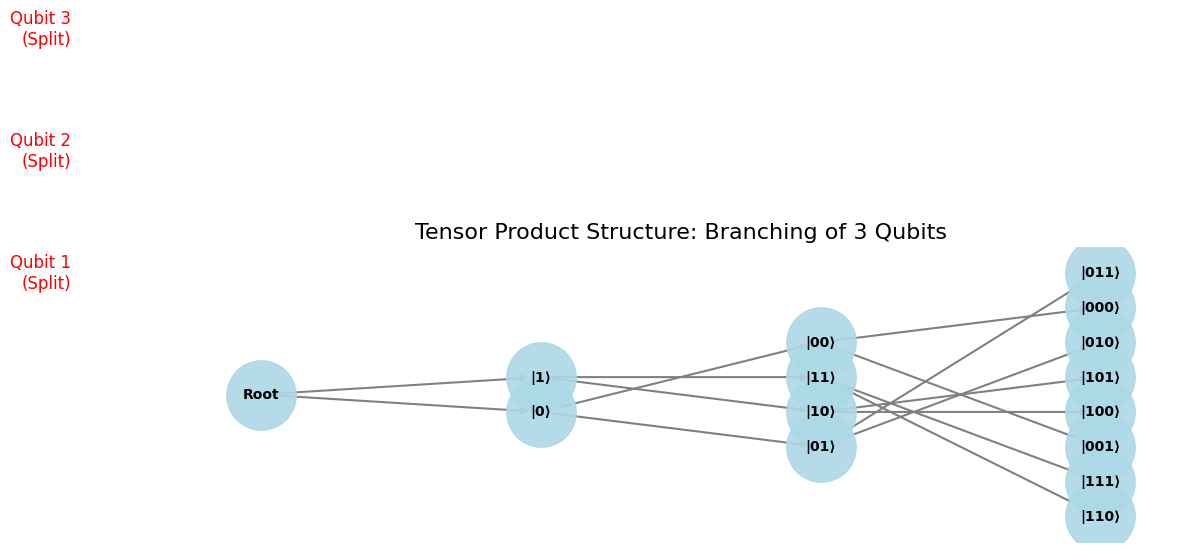

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_tensor_product_tree(qubits=3):
    G = nx.DiGraph()

    # 建立樹狀結構
    # 層級 0: 根節點
    G.add_node("Root", label="Start", layer=0)

    # 遞迴建立分支
    current_layer_nodes = [""]

    for i in range(1, qubits + 1):
        next_layer_nodes = []
        for parent in current_layer_nodes:
            # 對每個父節點，生成兩個子節點 (加上 0 和 加上 1)
            child0 = parent + "0"
            child1 = parent + "1"

            # 加入節點與邊
            # 如果是第一層，父節點是 Root
            u = "Root" if parent == "" else f"|{parent}⟩"
            v0 = f"|{child0}⟩"
            v1 = f"|{child1}⟩"

            G.add_edge(u, v0)
            G.add_edge(u, v1)

            # 設定層級屬性用於繪圖
            G.nodes[v0]['layer'] = i
            G.nodes[v1]['layer'] = i

            next_layer_nodes.extend([child0, child1])

        current_layer_nodes = next_layer_nodes

    # 設定繪圖佈局 (Multipartite layout for tree structure)
    pos = nx.multipartite_layout(G, subset_key="layer")

    plt.figure(figsize=(12, 8))

    # 繪製節點和邊
    nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='lightblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=1.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # 標註層級意義
    for i in range(1, qubits + 1):
        plt.text(-0.1, i, f"Qubit {i}\n(Split)", fontsize=12, color='red',
                 horizontalalignment='right', verticalalignment='center', transform=plt.gca().get_yaxis_transform())

    plt.title(f"Tensor Product Structure: Branching of {qubits} Qubits", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 執行繪圖 (建議不要超過 5 層，否則會太擠)
draw_tensor_product_tree(3)